In [3]:
import pandas as pd
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


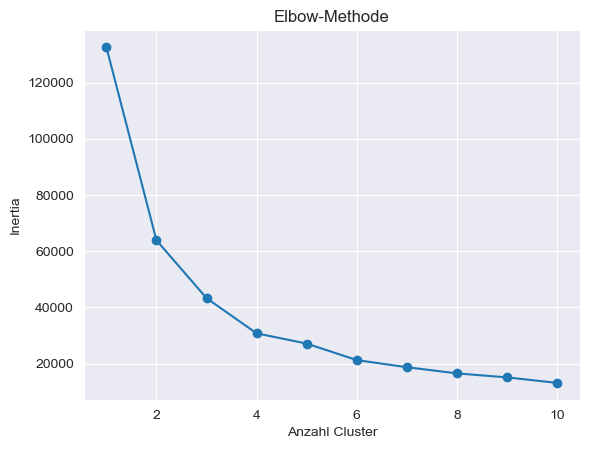

In [34]:
# import cleaned Dataframes from Data preparation
df_cleaned = pd.read_pickle(os.path.join('Data', 'charging_data.pkl'))

# Select relevant columns for the cluster analysis
data_for_clustering = df_cleaned[['kWhDelivered', 'charging_duration']]  # Maby different?
#data_for_clustering = df_cleaned[['kWhDelivered', 'charging_duration', 'connection_duration']]  # Maby different?

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Elbow-Plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Anzahl Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode')
plt.show()

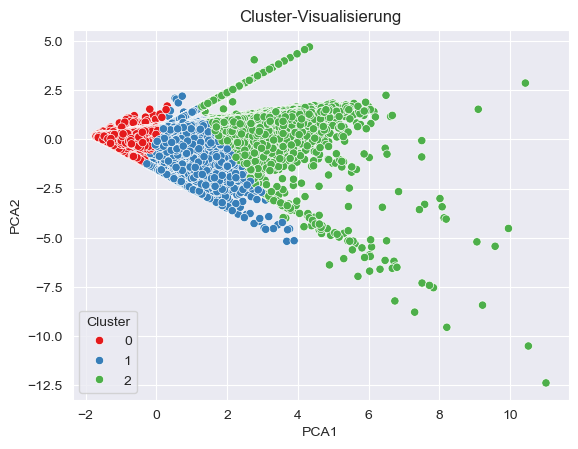

Average energy delivered (kWhDelivered) | Average charging time
         kWhDelivered  charging_duration
Cluster                                 
0            6.455537         114.940209
1           14.534317         316.071369
2           36.779215         448.500112


In [35]:
optimal_k = 3  # Basierend auf dem Elbow-Plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(data_scaled)

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df_cleaned['PCA1'] = data_pca[:, 0]
df_cleaned['PCA2'] = data_pca[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_cleaned, palette='Set1')
plt.title('Cluster-Visualisierung')
plt.show()

cluster_summary = df_cleaned.groupby('Cluster')[['kWhDelivered', 'charging_duration']].mean()
#cluster_summary = df_cleaned.groupby('Cluster')[['kWhDelivered', 'charging_duration', 'connection_duration']].mean()
# cluster_summary = df_cleaned.groupby('Cluster')[['charging_duration', 'siteID']].mean()

print("Average energy delivered (kWhDelivered) | Average charging time")
print(cluster_summary)

In [32]:
print("PCA Components:")
print(pca.components_)

PCA Components:
[[ 0.55586868  0.64030799  0.53010913]
 [-0.6622366  -0.0443461   0.74798136]]


In [33]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

Explained Variance Ratio:
[0.65416235 0.23586769]
